**Gender and Age Detection using OpenCV and Python**

**Importing Libraries**

In [72]:
import cv2
import math
import argparse

**Function to highlight faces in an image**

In [73]:
def highlightFace(net, frame, conf_threshold=0.7):
    frameOpencvDnn=frame.copy()
    frameHeight=frameOpencvDnn.shape[0]
    frameWidth=frameOpencvDnn.shape[1]
    blob=cv2.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)
    # Set the input blob for the neural network
    net.setInput(blob)
    # Forward pass to get the detections
    detections=net.forward()
    faceBoxes=[]
    # Loop through the detections
    for i in range(detections.shape[2]):
        confidence=detections[0,0,i,2]
        if confidence>conf_threshold:
            x1=int(detections[0,0,i,3]*frameWidth)
            y1=int(detections[0,0,i,4]*frameHeight)
            x2=int(detections[0,0,i,5]*frameWidth)
            y2=int(detections[0,0,i,6]*frameHeight)
            faceBoxes.append([x1,y1,x2,y2])
            # Draw rectangle around the face
            cv2.rectangle(frameOpencvDnn, (x1,y1), (x2,y2), (0,255,0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn,faceBoxes

**File paths for face, age, and gender detection models**

In [74]:
faceProto="opencv_face_detector[1].pbtxt"
faceModel="opencv_face_detector_uint8[1].pb"
ageProto="age_deploy[1].prototxt"
ageModel="age_net[2].caffemodel"
genderProto="gender_deploy[2].prototxt"
genderModel="gender_net[1].caffemodel"

**Mean values for model input**

In [75]:
MODEL_MEAN_VALUES=(78.4263377603, 87.7689143744, 114.895847746)
# Labels for age and gender prediction
ageList=['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList=['Male','Female']

**Load neural networks for face, age, and gender detection**

In [76]:
faceNet=cv2.dnn.readNet(faceModel,faceProto)
ageNet=cv2.dnn.readNet(ageModel,ageProto)
genderNet=cv2.dnn.readNet(genderModel,genderProto)

**Specify the path to the image**

In [77]:
image_path = "/content/man1[1].jpg"
image_path

'/content/man1[1].jpg'

**Read the image**

array([[[63, 79, 95],
        [64, 80, 96],
        [65, 81, 97],
        ...,
        [31, 48, 51],
        [31, 48, 51],
        [31, 48, 51]],

       [[63, 79, 95],
        [64, 80, 96],
        [65, 81, 97],
        ...,
        [29, 48, 51],
        [29, 48, 51],
        [29, 48, 51]],

       [[64, 80, 96],
        [65, 81, 97],
        [66, 82, 98],
        ...,
        [30, 49, 52],
        [30, 49, 52],
        [30, 49, 52]],

       ...,

       [[47, 56, 70],
        [47, 56, 70],
        [47, 56, 70],
        ...,
        [72, 77,  0],
        [62, 56,  0],
        [66, 51,  2]],

       [[46, 55, 69],
        [46, 55, 69],
        [46, 55, 69],
        ...,
        [58, 58,  0],
        [54, 46,  0],
        [61, 45,  3]],

       [[46, 55, 69],
        [46, 55, 69],
        [46, 55, 69],
        ...,
        [47, 44,  0],
        [48, 37,  0],
        [58, 40,  3]]], dtype=uint8)
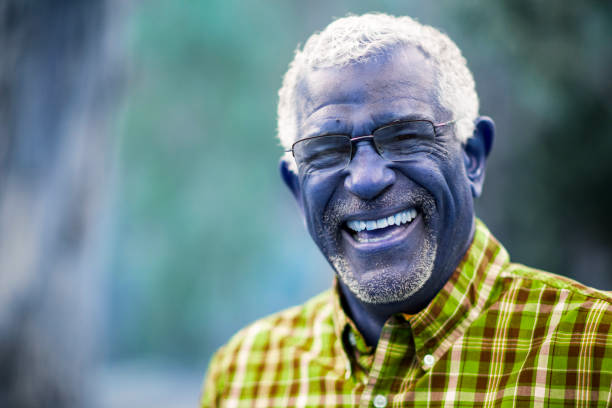

In [78]:
frame = cv2.imread(image_path)
frame

**Highlight faces in the image**

In [79]:
resultImg, faceBoxes = highlightFace(faceNet, frame)

In [80]:
if not faceBoxes:
    print("No face detected")

In [81]:
padding = 20
# Loop through each detected face
for faceBox in faceBoxes:
   # Extract the face region from the frame
    face = frame[max(0, faceBox[1] - padding):
                min(faceBox[3] + padding, frame.shape[0] - 1), max(0, faceBox[0] - padding)
                :min(faceBox[2] + padding, frame.shape[1] - 1)]

 **Preprocess the face image for gender prediction**

In [82]:
blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
# Predict gender
genderNet.setInput(blob)
genderPreds = genderNet.forward()
gender = genderList[genderPreds[0].argmax()]
print(f'Gender: {gender}')

Gender: Male


**Age prediction**

In [83]:
# Predict age
ageNet.setInput(blob)
agePreds = ageNet.forward()
age = ageList[agePreds[0].argmax()]
print(f'Age: {age[1:-1]} years')


Age: 38-43 years


**To display images in google colab**

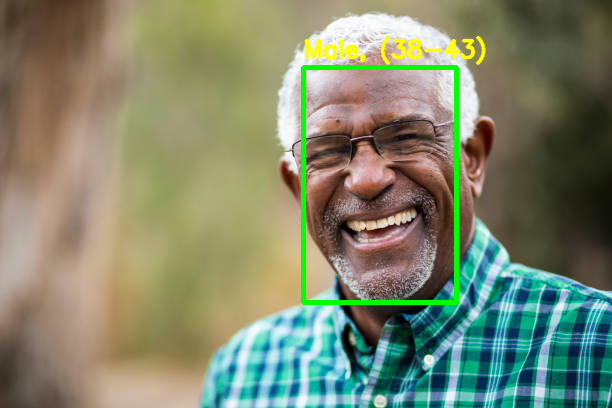

In [84]:
from google.colab.patches import cv2_imshow
# Draw text on the image with predicted gender and age
cv2.putText(resultImg, f'{gender}, {age}', (faceBox[0], faceBox[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv2.LINE_AA)
# Display the image with annotations
cv2_imshow(resultImg)

cv2.waitKey(0)
cv2.destroyAllWindows()